<a href="https://colab.research.google.com/github/Karan-Trips/E-Grain-Application/blob/main/Anime%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors

In [66]:
df = pd.read_csv('anime.csv')
df.head()



,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [67]:
df.isnull().sum()
episode_ = df['episodes'].replace('Unknown', np.nan)
episode_ = episode_.fillna(episode_.median())



Text(0.5, 1.0, 'Popular anime')

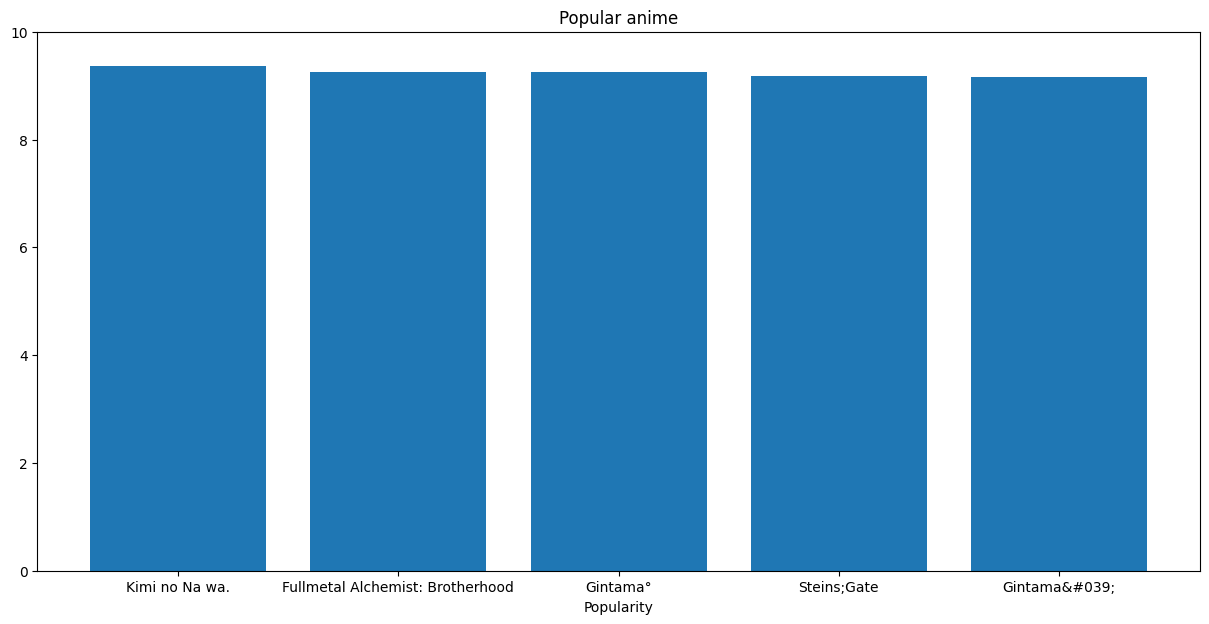

In [68]:
plt.figure(figsize=(15,7 ))
plt.ylim(0.0, 10.0)


plt.bar(df['name'].head(5), df['rating'].head(5))


plt.xlabel("Popularity")
plt.title("Popular anime")
# plt.gca().invert_yaxis()

In [69]:
type_ = pd.get_dummies(df['type'])
genre_ = df['genre'].str.get_dummies(sep=',')
genre_.head(10)

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = pd.concat([genre_, type_, episode_, df['rating'], df['members']],axis=1)
X.head(10)

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,Movie,Music,ONA,OVA,Special,TV,episodes,rating,members
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,9.37,200630
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,64,9.26,793665
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.25,114262
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,24,9.17,673572
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.16,151266
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,10,9.15,93351
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,148,9.13,425855
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,110,9.11,80679
8,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,9.10,72534
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13,9.11,81109


In [72]:
scaled = MaxAbsScaler()
X = scaled.fit_transform(X)
recommendations = NearestNeighbors(n_neighbors=11).fit(X)
recommendations.kneighbors(X)

(array([[0.00000000e+00, 1.01506549e+00, 1.03095542e+00, ...,
         1.45773221e+00, 1.45854509e+00, 1.45930354e+00],
        [0.00000000e+00, 1.02227158e+00, 1.49378838e+00, ...,
         1.74844630e+00, 1.78151418e+00, 1.81460945e+00],
        [0.00000000e+00, 3.75894154e-02, 4.12559430e-02, ...,
         1.42183188e+00, 1.42808851e+00, 1.73790593e+00],
        ...,
        [0.00000000e+00, 1.66436926e-03, 1.68253094e-03, ...,
         8.07869678e-03, 1.01353307e-02, 1.11230973e-02],
        [0.00000000e+00, 1.00174940e-03, 1.10513608e-03, ...,
         4.01486740e-03, 5.00190620e-03, 5.03023042e-03],
        [2.98023224e-08, 1.00179958e+00, 1.41421365e+00, ...,
         1.41421400e+00, 1.41421404e+00, 1.41421417e+00]]),
 array([[    0,   208,  1494, ...,  5794,  5695,  5803],
        [    1,   200,   268, ...,   288,   374,   255],
        [    2,     4,     9, ...,   306,  1833,   380],
        ...,
        [12014, 11971, 11970, ..., 11972, 12015, 11964],
        [12015, 11964, 1

In [73]:
anime_indices = recommendations.kneighbors(X)[1]

In [78]:
def get_index(x):

    return df[df['name']==x].index.tolist()[0]

def recommend_me(anime):
    print('Here are 10 anime similar to', anime, ':' '\n')
    index = get_index(anime)


    for i in anime_indices[index][:]:
            print(df.iloc[i]['name'],'\n' 'Genre: ', df.iloc[i]['genre'],'\n' 'Episode count: ', df.iloc[i]['episodes'],'\n' 'Rating out of 10:', df.iloc[i]['rating'],'\n\n')

In [79]:
recommend_me('Death Note')


Here are 10 anime similar to Death Note :

Death Note 
Genre:  Mystery, Police, Psychological, Supernatural, Thriller 
Episode count:  37 
Rating out of 10: 8.71 


Higurashi no Naku Koro ni Kai 
Genre:  Mystery, Psychological, Supernatural, Thriller 
Episode count:  24 
Rating out of 10: 8.41 


Death Note Rewrite 
Genre:  Mystery, Police, Psychological, Supernatural, Thriller 
Episode count:  2 
Rating out of 10: 7.84 


Jigoku Shoujo Mitsuganae 
Genre:  Mystery, Psychological, Supernatural 
Episode count:  26 
Rating out of 10: 7.81 


Yakushiji Ryouko no Kaiki Jikenbo 
Genre:  Mystery, Police, Supernatural 
Episode count:  13 
Rating out of 10: 7.19 


Saint Luminous Jogakuin 
Genre:  Mystery, Psychological, Supernatural 
Episode count:  13 
Rating out of 10: 6.17 


Boku dake ga Inai Machi 
Genre:  Mystery, Psychological, Seinen, Supernatural 
Episode count:  12 
Rating out of 10: 8.65 


Shiki 
Genre:  Mystery, Supernatural, Thriller, Vampire 
Episode count:  22 
Rating out of 10